 # Project - YouTube Trending Video Statistic Analysis and  Modeling 

<img src="https://www.techdotmatrix.com/wp-content/uploads/2016/12/YouTube-new-logo.jpg" 
 style="height: 150px;"/ align=left>


Data Source: https://www.kaggle.com/datasnaek/youtube-new/data

## Part 1 - Problem Statement 

### 1.1 Problem Statement
With data collected from the 200 listed trending YouTube videos every day in two countries, I target learning features and comments of trending videos to answer the below questions:
  - which dynamic of trending video features look like? 
  - which categories, channels or videos are most trending? 
  - Are trending video features different between U.S and U.K?
  - whether video categories can be predicted based on video comments? 

### 1.2 Hypothese

  - Features and comment words of trending videos are different across categories
  - We can build a prediction classifier to predict video categories based on comment words

### 1.3 Potential Methods


  - Statistical Exploratory Analysis 
  - Classification Modeling 


## Part 2 - Data Exploration

### 2.1 Data Proprecessing

#### 2.1.1 Data Loading and Joining

In [1]:
import numpy as np
import pandas as pd
import json 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-white')
sns.set()
import sys

Loading two countries video data from two .csv files and combining data into one table 

In [2]:
path = '/Users/celia/Desktop/DS2017/FinalProject/data/youtube_with_time/'
us=pd.read_csv(path+'USvideos.csv')
uk=pd.read_csv(path+'GBvideos.csv')

us['country'] ='US'
uk['country'] ='UK'
raw_data = pd.concat([us,uk])
print(raw_data.info())
raw_data.head(3)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26792 entries, 0 to 13391
Data columns (total 17 columns):
video_id                  26792 non-null object
trending_date             26792 non-null object
title                     26792 non-null object
channel_title             26792 non-null object
category_id               26792 non-null int64
publish_time              26792 non-null object
tags                      26792 non-null object
views                     26792 non-null int64
likes                     26792 non-null int64
dislikes                  26792 non-null int64
comment_count             26792 non-null int64
thumbnail_link            26792 non-null object
comments_disabled         26792 non-null bool
ratings_disabled          26792 non-null bool
video_error_or_removed    26792 non-null bool
description               26355 non-null object
country                   26792 non-null object
dtypes: bool(3), int64(5), object(9)
memory usage: 3.1+ MB
None


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,US
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",US
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,US


Loading id-category mapping table from JSON files; by comparison US category id file contains the most completed id-category mapping and thus we will use this file to create a id-category lookup table.

In [3]:
# Load JSon file
with open(path+'US_category_id.json', 'r') as raw:
    uscat = json.load(raw)
print(list(filter(lambda x: x['kind'] ==  'youtube#videoCategory', uscat['items'][:3])))
# convert Jason to DataFrame
items = pd.DataFrame(uscat['items'])
items = items.join(items.snippet.apply(lambda x: pd.Series(x)))
items.head(3)

[{'kind': 'youtube#videoCategory', 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKmPBggty2mZQ"', 'id': '1', 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'title': 'Film & Animation', 'assignable': True}}, {'kind': 'youtube#videoCategory', 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/UZ1oLIIz2dxIhO45ZTFR3a3NyTA"', 'id': '2', 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'title': 'Autos & Vehicles', 'assignable': True}}, {'kind': 'youtube#videoCategory', 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/nqRIq97-xe5XRZTxbknKFVe5Lmg"', 'id': '10', 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'title': 'Music', 'assignable': True}}]


,etag,id,kind,snippet,assignable,channelId,title
0,"""m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKm...",1,youtube#videoCategory,"{'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'tit...",True,UCBR8-60-B28hp2BmDPdntcQ,Film & Animation
1,"""m2yskBQFythfE4irbTIeOgYYfBU/UZ1oLIIz2dxIhO45Z...",2,youtube#videoCategory,"{'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'tit...",True,UCBR8-60-B28hp2BmDPdntcQ,Autos & Vehicles
2,"""m2yskBQFythfE4irbTIeOgYYfBU/nqRIq97-xe5XRZTxb...",10,youtube#videoCategory,"{'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'tit...",True,UCBR8-60-B28hp2BmDPdntcQ,Music


In [4]:
# Create category id to category mapping list
us_mapping = {}
for category in uscat['items']:
        us_mapping[category['id']] = category['snippet']['title']
print(us_mapping)

# convert string type of id to integer type for further data joining
mapping_list = items[['id','title']]
mapping_list['id']=mapping_list['id'].astype(int)

{'1': 'Film & Animation', '2': 'Autos & Vehicles', '10': 'Music', '15': 'Pets & Animals', '17': 'Sports', '18': 'Short Movies', '19': 'Travel & Events', '20': 'Gaming', '21': 'Videoblogging', '22': 'People & Blogs', '23': 'Comedy', '24': 'Entertainment', '25': 'News & Politics', '26': 'Howto & Style', '27': 'Education', '28': 'Science & Technology', '29': 'Nonprofits & Activism', '30': 'Movies', '31': 'Anime/Animation', '32': 'Action/Adventure', '33': 'Classics', '34': 'Comedy', '35': 'Documentary', '36': 'Drama', '37': 'Family', '38': 'Foreign', '39': 'Horror', '40': 'Sci-Fi/Fantasy', '41': 'Thriller', '42': 'Shorts', '43': 'Shows', '44': 'Trailers'}


/Users/celia/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


Adding video category into video data table by looking up categories from the category id-category lookup table

In [5]:
# Add video category into video data table 
data =raw_data.merge(mapping_list, how='left', left_on='category_id', right_on='id')
data =data.drop('id',axis =1)
data.rename(columns = {'title_y':'category'}, inplace = True)
data.rename(columns = {'title_x':'video_title'}, inplace = True)
print(data.isnull().sum())

video_id                    0
trending_date               0
video_title                 0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               437
country                     0
category                    0
dtype: int64


#### 2.1.2 Dealing with Timestamps

In [6]:
data['trending_date'] = pd.to_datetime(data['trending_date'], format='%y.%d.%m')
print(data['trending_date'].head())

0   2017-11-14
1   2017-11-14
2   2017-11-14
3   2017-11-14
4   2017-11-14
Name: trending_date, dtype: datetime64[ns]


In [7]:
data['publish_datetime'] = pd.to_datetime(data['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ')
data.head(2)

,video_id,trending_date,video_title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,category,publish_datetime
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,US,People & Blogs,2017-11-13 17:13:01
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",US,Entertainment,2017-11-13 07:30:00


In [8]:
data = data.drop('publish_time', axis=1)
data.insert(2, 'publish_date', data['publish_datetime'].dt.date)
data.head(2)

,video_id,trending_date,publish_date,video_title,channel_title,category_id,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,category,publish_datetime
0,2kyS6SvSYSE,2017-11-14,2017-11-13,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,US,People & Blogs,2017-11-13 17:13:01
1,1ZAPwfrtAFY,2017-11-14,2017-11-13,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",US,Entertainment,2017-11-13 07:30:00


In [9]:
data.insert(3, 'publish_time', data['publish_datetime'].dt.time)
data.head(2)

,video_id,trending_date,publish_date,publish_time,video_title,channel_title,category_id,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,category,publish_datetime
0,2kyS6SvSYSE,2017-11-14,2017-11-13,17:13:01,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,US,People & Blogs,2017-11-13 17:13:01
1,1ZAPwfrtAFY,2017-11-14,2017-11-13,07:30:00,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",US,Entertainment,2017-11-13 07:30:00


#### 2.1.3 Dealing with Data Types

In [10]:
print(data.dtypes)

video_id                          object
trending_date             datetime64[ns]
publish_date                      object
publish_time                      object
video_title                       object
channel_title                     object
category_id                        int64
tags                              object
views                              int64
likes                              int64
dislikes                           int64
comment_count                      int64
thumbnail_link                    object
comments_disabled                   bool
ratings_disabled                    bool
video_error_or_removed              bool
description                       object
country                           object
category                          object
publish_datetime          datetime64[ns]
dtype: object


In [11]:
data['publish_date'] = pd.to_datetime(data['publish_date'])
data['category_id'] = data['category_id'].astype(str)

#### 2.1.4 Checking boolean variables and duplicates

In [12]:
print('% of removed videos: ',len(data[data['video_error_or_removed']==True])/len(data))
print('% of videos with disabled comments: ',len(data[data['comments_disabled']==True])/len(data))
print('% of videos with disabled ratings: ',len(data[data['ratings_disabled']==True])/len(data))
# ???
#len(data[(data['comments_disabled']== True) or (data['ratings_disabled']== True) or 
         #(data['video_error_or_removed']== True)]/len(data)

% of removed videos:  3.7324574499850704e-05
% of videos with disabled comments:  0.016646760226933413
% of videos with disabled ratings:  0.005598686174977606


In [13]:
len(data[data['video_error_or_removed']==True])
#data[data['video_error_or_removed']==True].country.value_counts()

1

In [14]:
len(data[data['comments_disabled']==True])

446

In [15]:
len(data[data['ratings_disabled']==True])

150

From above, it is seen that France and Germancy had the most trending videos that disabled comments and ratings. Videos that were removed or disabled ratings or comments counted a small size (<2%) of our total dataset. To analyze the impact of views, comments and ratings on video popularity, I removed these records from the dataset. 

In [16]:
df = data[(data['comments_disabled']==False) & (data['ratings_disabled']==False) & 
          (data['video_error_or_removed']==False)]
df=df.drop(['comments_disabled','ratings_disabled','video_error_or_removed'],axis = 1)

In [17]:
print(len(df))
print(len(df.drop_duplicates()))

26284
26284


#### 2.1.5 Summary - Data Dictionary and Description


Variable | Description | Type
---| ---| ---
trending_date | the date the video was collected, YY-MM-DD | timestamps/continuous 
publish_date | the date at which the video was published on YouTube, YY-MM-DD | timestamps/continuous
publish_time | the time at which the video was published on YouTube, HH-MM-SS | timestamps/continuous 
publish_datetime | the date at which the video was published on YouTube, YY-MM-DD HH-MM-SS | timestamps/continuous
video_id| video id | categorical/string
category_id | category id | categorical/string
video_title | video title | categorical/string
channel_title | channel title | categorical/string
category | video category | categorical/string
country | data collected from U.S. or U.K. | categorical/string
thumbnail_link | video images | string
description | video description | string
tags | separated by [|] character [none] means no tags | string
views | views | integer
likes | likes | integer
dislikes | dislikes | integer
comment_count | comment counts | integer



In [18]:
df.describe()

,views,likes,dislikes,comment_count
count,2.628400e+04,2.628400e+04,2.628400e+04,2.628400e+04
mean,1.727393e+06,5.966698e+04,5.280802e+03,8.010821e+03
std,6.921196e+06,2.041553e+05,6.496826e+04,5.028059e+04
min,6.870000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,9.884175e+04,2.314000e+03,8.800000e+01,3.210000e+02
50%,3.246505e+05,9.326500e+03,3.250000e+02,1.060000e+03
75%,1.126654e+06,3.512575e+04,1.239000e+03,3.753000e+03
max,1.698846e+08,3.312868e+06,1.944971e+06,1.626501e+06


In [19]:
print(len(df))
print(len(df.drop_duplicates()))
print(df.video_id.nunique())

26284
26284
3949


In [20]:
# Because there are duplicates between US dataset and UK dataset, 
# I will create three datasets - 1) UK only 2) US only 3) Total records but eliminated duplicates 

df_us = df[df['country']=='US']
df_uk = df[df['country']=='UK']
df_total = df.drop('country', axis=1)
df_total = df_total.drop_duplicates()
print(df_total.shape)
print(df_us.shape)
print(df_uk.shape)

(24271, 16)
(13142, 17)
(13142, 17)


In [21]:
print('video published time range: ', df['publish_date'].min(), df['publish_datetime'].max())
print('video trending time range: ', df['trending_date'].min(), df['trending_date'].max())

video published time range:  2007-12-03 00:00:00 2018-01-21 05:44:30
video trending time range:  2017-11-14 00:00:00 2018-01-21 00:00:00


In [22]:
print ("We have %d records for %d trending videos during 2008-2018 collected from U.S. and U.K.since 11/2017" % \
    (len(df_total), df_total.video_id.nunique()))

We have 24271 records for 3949 trending videos during 2008-2018 collected from U.S. and U.K.since 11/2017


### 2.2 Data Statistics and Correlation Analysis

This section focuses on three dimensions of trending videos - video category, video channel and video title by analyzing four metrics - Views, Likes, Dislikes and Comments that in general measure video popularity (number of views), audience overall sentiment(number of likes and dislikes) and audience engagement (number of comments). We will test correlation among these four metrics.

#### 2.2.1 Feature Metrics Exploration and Correlation

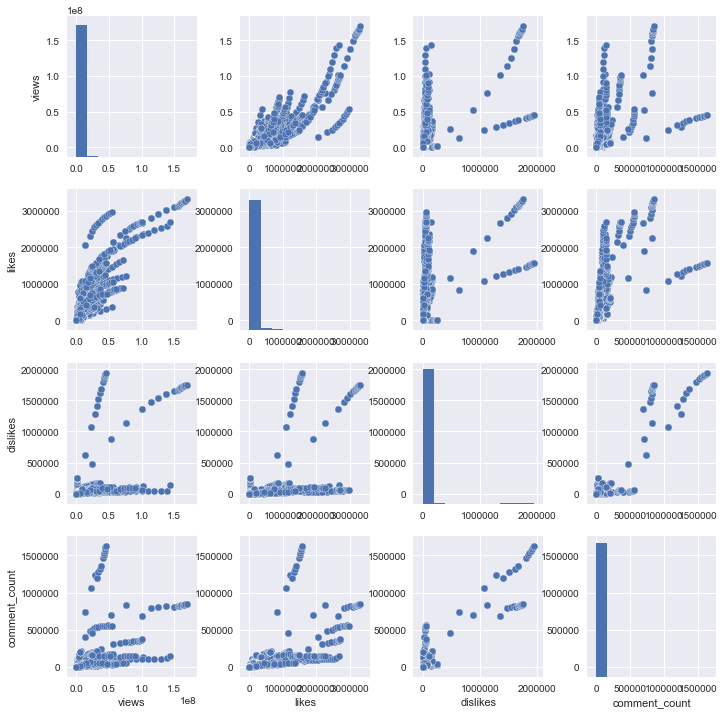

In [23]:
metrics = ['views','likes','dislikes','comment_count']
sns.pairplot(df_total[metrics])

                  views     likes  dislikes  comment_count
views          1.000000  0.891454  0.601748       0.620622
likes          0.891454  1.000000  0.526701       0.689799
dislikes       0.601748  0.526701  1.000000       0.889452
comment_count  0.620622  0.689799  0.889452       1.000000


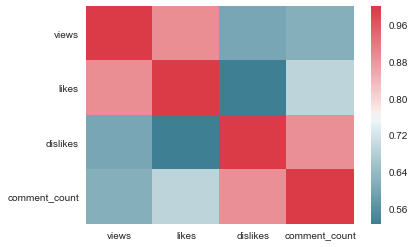

In [24]:
# Overall Correlation 
metrics = ['views','likes','dislikes','comment_count']
print(df_total[metrics].corr())
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df_total[metrics].corr(), cmap=cmap)


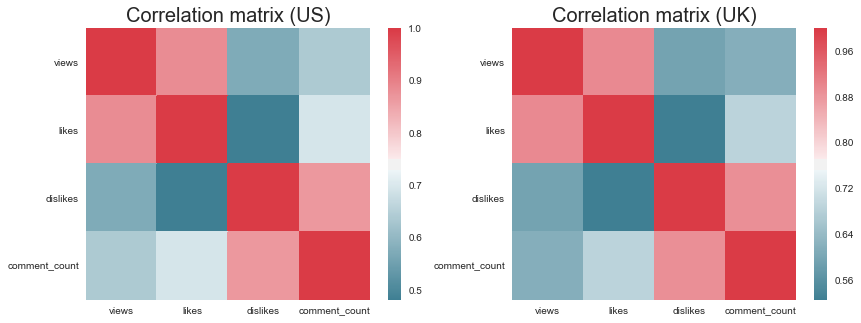

In [25]:
corr_us = df_us[metrics].corr()
corr_uk = df_uk[metrics].corr()

fig = plt.figure(figsize=(14, 5))

ax1 = plt.subplot(121)
ax1 = sns.heatmap(corr_us, cmap=cmap)
ax1.set_title('Correlation matrix (US)', fontsize=20)
plt.yticks(rotation=0)

ax2 = plt.subplot(122)
ax1 = sns.heatmap(corr_uk,cmap=cmap)
ax2.set_title('Correlation matrix (UK)', fontsize=20)
plt.yticks(rotation=0)

plt.show()

__From above, we can see that 1) Views and Likes show strong positive correlation. Videos with more views are more likely to have more likes. 2) It is interesting to see that dislikes has low positive correlation with views but high correlation with comments. The correlation score between Dislikes and Comments is higher than the score between likes and comments. 3) There is low correlation between views and comments; 4) When breaking down features by country segment, the correlation looks consistent between US and UK. __

#### 2.2.1 Analysis of Video Category

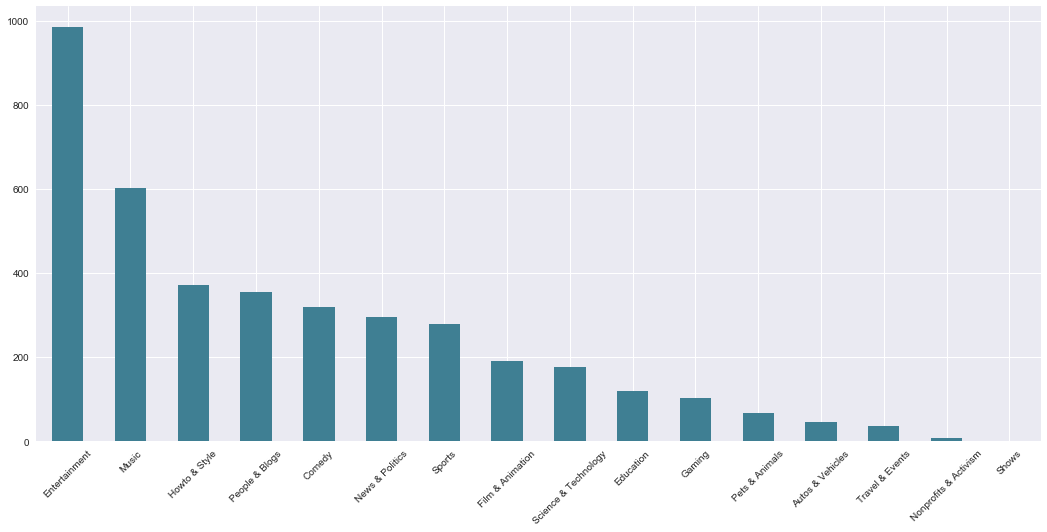

Entertainment            985
Music                    602
Howto & Style            372
People & Blogs           355
Comedy                   319
News & Politics          294
Sports                   279
Film & Animation         190
Science & Technology     176
Education                119
Gaming                   102
Pets & Animals            66
Autos & Vehicles          45
Travel & Events           37
Nonprofits & Activism      7
Shows                      1
Name: category, dtype: int64

In [26]:
# How many videos per category - 
video_counts = df_total.drop_duplicates('video_id').category.value_counts()
plt.style.use('seaborn')
ax = video_counts.plot.bar(cmap=cmap,figsize =(18,8))
ax.set_xticklabels(labels=video_counts.index, rotation=45, fontsize=10)
plt.show()

video_counts

__"Entertainment" and "Music" take the lead in the number of total trending videos, while "Nonprofits & Activism" and "Shows" have the least number of trending videos in our dataset.__

In [27]:
# Since video numbers by category are different and also each video lasts trending time differently, 
# I aggregated metrics counts for each video and then averaged counts by video numbers for each category
#??? how to sort the results by views?
video_grouped = df_total.groupby(['category','video_id','video_title','channel_title','thumbnail_link'],as_index=False).sum()
category_grouped = video_grouped.groupby('category').mean()

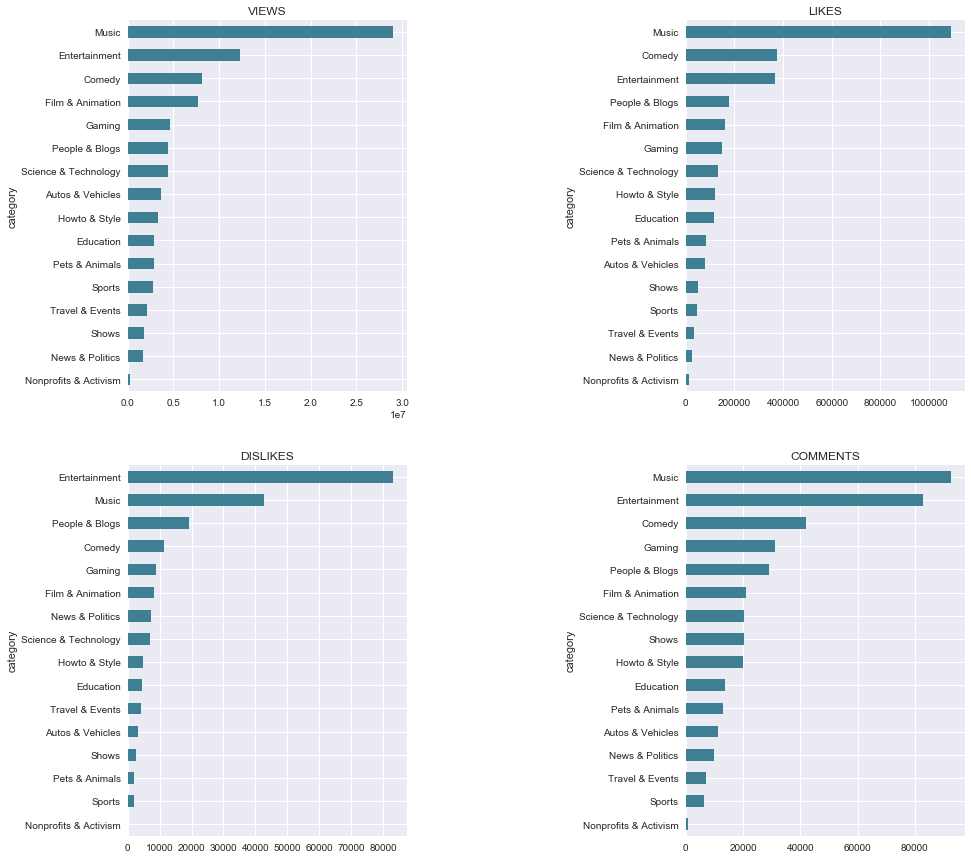

In [28]:
# visualization - Metrics by Category 

fig, axes = plt.subplots(2, 2, figsize=(15, 15))
plt.style.use('seaborn')
fig.subplots_adjust(wspace=1.0)

def categorychart(metric, i,j):
    return metric.sort_values(ascending = True).plot(kind='barh', ax=axes[i,j],cmap=cmap)


ax1 = categorychart(category_grouped.views,0,0)
#plt.title('VIEWS')
ax2 = categorychart(category_grouped.likes,0,1)
ax3 = categorychart(category_grouped.dislikes,1,0)
ax4 = categorychart(category_grouped.comment_count,1,1)
ax1.title.set_text('VIEWS')
ax2.title.set_text('LIKES')
ax3.title.set_text('DISLIKES')
ax4.title.set_text('COMMENTS')
plt.show()


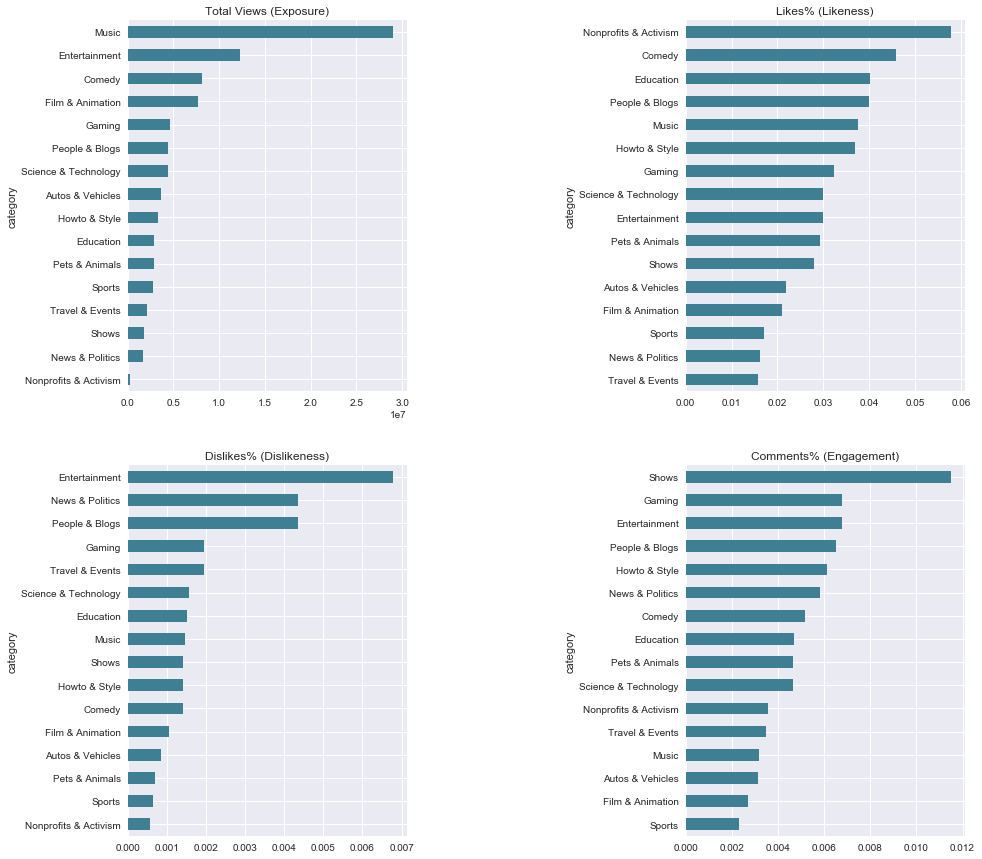

In [29]:

category_grouped['likes_rate'] = category_grouped['likes']/category_grouped['views']
category_grouped['dislikes_rate'] = category_grouped['dislikes']/category_grouped['views']
category_grouped['comment_rate'] = category_grouped['comment_count']/category_grouped['views']
#category_grouped['likeness_score']=category_grouped['likes_rate']-category_grouped['dislikes_rate']
fig, axes = plt.subplots(2, 2, figsize=(15, 15))
fig.subplots_adjust(wspace=1.0)

ax1 = categorychart(category_grouped.views,0,0)
#plt.title('Avarage Video Views')
ax2 = categorychart(category_grouped.likes_rate,0,1)
ax3 = categorychart(category_grouped.dislikes_rate,1,0)
ax4 = categorychart(category_grouped.comment_rate,1,1)
ax1.title.set_text('Total Views (Exposure)')
ax2.title.set_text('Likes% (Likeness)')
ax3.title.set_text('Dislikes% (Dislikeness)')
ax4.title.set_text('Comments% (Engagement)')
plt.show()



__From above we can see that 1) Music and Entertainment videos drew most of eyeballs; 2) "Nonprofits & Activism" category has the highest likeness rate and the lowest dislikeness rate though it reached the least views. 3) "Sports" showed relatively low rates of metrics that represents a low level of engagement. It could be because peopel prefer watching live sports, engaging discussions as games went on and getting up_to_the_minute scores. 4) News & Politics videos delivered a high rate of dislike % and a low rate of like% though views on videos in this category were not much. A possible of explanation is that in this category topics are usually controversial and people easily have strong opinions and pre-determined dislikes no matter what video content is__. 

#### 2.2.2 Top trending videos

In [30]:
video_grouped['likes_rate'] = video_grouped['likes']/video_grouped['views']
video_grouped['dislikes_rate'] = video_grouped['dislikes']/video_grouped['views']
video_grouped['comment_rate'] = video_grouped['comment_count']/video_grouped['views']

#video_grouped['Net_likes'] = video_grouped['likes']/video_grouped['views']

top_videos_comment_rate =video_grouped.sort_values('comment_rate',ascending = False).head(5)
top_videos_likes =video_grouped.sort_values('likes',ascending = False).head(5)
top_videos_comment_rate.thumbnail_link.values

array(['https://i.ytimg.com/vi/2E_HEeOpiEA/default.jpg',
       'https://i.ytimg.com/vi/aCoDqL1dK9c/default.jpg',
       'https://i.ytimg.com/vi/yN8Jclaqf0Q/default.jpg',
       'https://i.ytimg.com/vi/lojZXnH_978/default.jpg',
       'https://i.ytimg.com/vi/sd80ZipTMDE/default.jpg'], dtype=object)

In [31]:
top_videos_list = top_videos_likes[['category','channel_title','video_title','likes']]
from IPython.display import HTML
top_videos_list['image'] = ['https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg',
                       'https://i.ytimg.com/vi/kTlv5_Bs8aw/default.jpg',
                       'https://i.ytimg.com/vi/6ZfuNTqbHE8/default.jpg',
                       'https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg',
                       'https://i.ytimg.com/vi/LsoLEjrDogU/default.jpg']
top_videos_list['image'] = top_videos_list['image'].apply(lambda x: '<img src="{}"/>'.format(x) if x else '')
HTML(top_videos_list.to_html(escape=False))

/Users/celia/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/Users/celia/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,category,channel_title,video_title,likes,image
741,Entertainment,YouTube Spotlight,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,71800761,"<img src=""https://i.ytimg.com/vi/FlsCjmMhFmw/d..."
2631,Music,ibighit,BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Offi...,49327014,"<img src=""https://i.ytimg.com/vi/kTlv5_Bs8aw/d..."
618,Entertainment,Marvel Entertainment,Marvel Studios' Avengers: Infinity War Officia...,48860996,"<img src=""https://i.ytimg.com/vi/6ZfuNTqbHE8/d..."
2185,Music,Ed Sheeran,Ed Sheeran - Perfect (Official Music Video),31671313,"<img src=""https://i.ytimg.com/vi/2Vv-BfVoq4g/d..."
2362,Music,Bruno Mars,Bruno Mars - Finesse (Remix) [Feat. Cardi B] [...,29327843,"<img src=""https://i.ytimg.com/vi/LsoLEjrDogU/d..."


In [32]:
top_videos_comment_rate_list = top_videos_comment_rate[['category','channel_title','video_title','comment_rate']]
from IPython.display import HTML
top_videos_comment_rate_list['image'] = ['https://i.ytimg.com/vi/2E_HEeOpiEA/default.jpg',
                            'https://i.ytimg.com/vi/aCoDqL1dK9c/default.jpg',
                            'https://i.ytimg.com/vi/yN8Jclaqf0Q/default.jpg',
                            'https://i.ytimg.com/vi/lojZXnH_978/default.jpg',
                            'https://i.ytimg.com/vi/sd80ZipTMDE/default.jpg']
top_videos_comment_rate_list['image'] = top_videos_comment_rate_list['image'].apply(lambda x: '<img src="{}"/>'.format(x) if x else '')
HTML(top_videos_comment_rate_list.to_html(escape=False))

/Users/celia/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/Users/celia/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,category,channel_title,video_title,comment_rate,image
1802,Howto & Style,Manny Mua,FULL FACE USING 7-ELEVEN MAKEUP!,0.101387,"<img src=""https://i.ytimg.com/vi/2E_HEeOpiEA/d..."
2011,Howto & Style,NikkieTutorials,BEST MAKEUP OF 2017!,0.056362,"<img src=""https://i.ytimg.com/vi/aCoDqL1dK9c/d..."
3453,People & Blogs,Mouthy Buddha,RACE REALISM EXPLAINED,0.054661,"<img src=""https://i.ytimg.com/vi/yN8Jclaqf0Q/d..."
1270,Entertainment,The Rageaholic,THE LAST (Gasp of The) JEDI: A Rant,0.054252,"<img src=""https://i.ytimg.com/vi/lojZXnH_978/d..."
2136,Howto & Style,NikkieTutorials,$11.99 FOUNDATION VS. $40 FOUNDATION: Who Wins...,0.052730,"<img src=""https://i.ytimg.com/vi/sd80ZipTMDE/d..."


#### 2.2.3 Top trending channels

In [33]:
channels_grouped = df_total.groupby(['category','channel_title'],as_index=False).sum()

channels_grouped['likes_rate'] = channels_grouped['likes']/channels_grouped['views']
channels_grouped['dislikes_rate'] = channels_grouped['dislikes']/channels_grouped['views']
channels_grouped['comment_rate'] = channels_grouped['comment_count']/channels_grouped['views']

top_channel_list_views= channels_grouped.sort_values('views',ascending = False).head(5)
top_channel_list_likesper= channels_grouped.sort_values('likes_rate',ascending = False).head(5)
top_channel_list_dislikesper= channels_grouped.sort_values('dislikes_rate',ascending = False).head(5)
top_channel_list_commentsper= channels_grouped.sort_values('comment_rate',ascending = False).head(5)

print(top_channel_list_views[['category','channel_title','views']])

print(top_channel_list_likesper[['category','channel_title','likes_rate']])

print(top_channel_list_dislikesper[['category','channel_title','dislikes_rate']])

print(top_channel_list_commentsper[['category','channel_title','comment_rate']])

           category         channel_title       views
566   Entertainment     YouTube Spotlight  3192307613
1038          Music            Ed Sheeran  1951120438
390   Entertainment  Marvel Entertainment  1598432418
381   Entertainment      Logan Paul Vlogs  1133671093
1064          Music        GEazyMusicVEVO   981009484
              category channel_title  likes_rate
216      Entertainment     Amber Liu    0.172313
40              Comedy   Andrew Lowe    0.170907
663   Film & Animation    Max Joseph    0.158296
653   Film & Animation     KickThePj    0.155666
1497    People & Blogs  ConnorFranta    0.148290
             category     channel_title  dislikes_rate
1502   People & Blogs      Daily Caller       0.192427
1448  News & Politics   Washington Post       0.066734
1162            Music    MatthewSantoro       0.047459
381     Entertainment  Logan Paul Vlogs       0.030359
846     Howto & Style     Gigi Gorgeous       0.028765
            category  channel_title  comment_rate
88

#### 2.2.4 Trending Days

Text(0.5,1,'Number of Videos by Trending Dates')

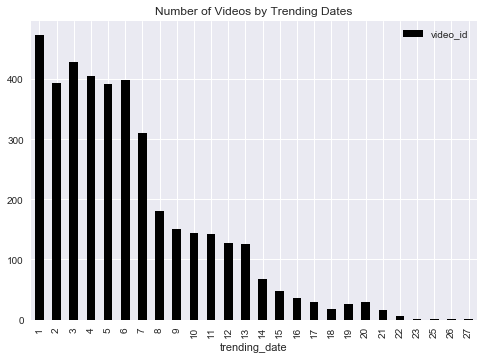

In [34]:
dates_per_video = df_total[['video_id', 'trending_date']].groupby('video_id', as_index = False).count()
count_per_dates = dates_per_video.groupby('trending_date', as_index = False)['video_id'].count()
count_per_dates = count_per_dates.set_index('trending_date')
count_per_dates.plot.bar(color ='black')
plt.title('Number of Videos by Trending Dates')
#ax = count_per_dates['video_id'].plot.bar(color='g')
#ax.set_xlabel("number of video_id")



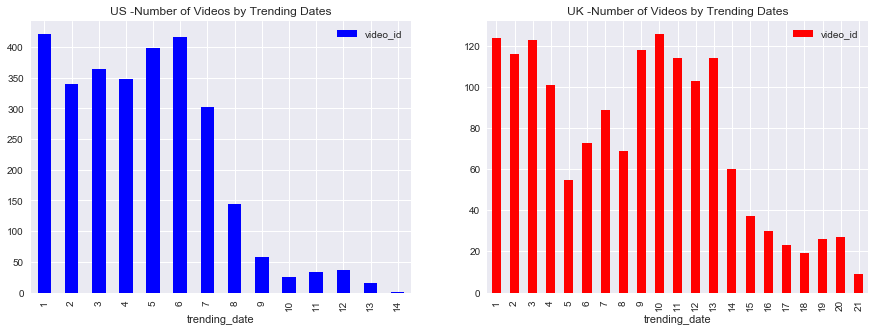

In [35]:
dates_per_video_us = df_us[['video_id', 'trending_date']].groupby('video_id', as_index = False).count()
count_per_dates_us = dates_per_video_us.groupby('trending_date', as_index = False)['video_id'].count()
count_per_dates_us = count_per_dates_us.set_index('trending_date')


dates_per_video_uk = df_uk[['video_id', 'trending_date']].groupby('video_id', as_index = False).count()
count_per_dates_uk = dates_per_video_uk.groupby('trending_date', as_index = False)['video_id'].count()
count_per_dates_uk = count_per_dates_uk.set_index('trending_date')


fig, axes = plt.subplots(1, 2, figsize=(15, 5))
#fig.subplots_adjust(wspace=0.5)

ax1 = count_per_dates_us.plot(kind ='bar',ax=axes[0],color='b')

ax2 = count_per_dates_uk.plot(kind ='bar',ax=axes[1],color='r')

ax1.title.set_text('US -Number of Videos by Trending Dates')
ax2.title.set_text('UK -Number of Videos by Trending Dates')

plt.show()


__UK audience showed higher adherence to trending videos and US audience showed a faster viewing turnover. Maximum amount of days being in trend for US audience was 6 days and for UK it was 10 days.__


To be continued in part 2